# Load the segmented trips

In [1]:
import matplotlib.pyplot as plt

In [2]:
import os
import json
import pandas as pd

# Initialize empty dataframes
road_df_list = []
second_segment_df_list = []

# Iterate over each dateID in the specified range (24 to 30)
for date_id in range(24, 31):
    # Generate filenames with dateID + 1 (to match the desired format)
    road_file_name = f'Splitting/Segmented Trial Week/Segmented_Trips_01_{date_id + 1}.json'
    segment_file_name = f'Splitting/Segmented Trial Week/Merchants_Segments_01_{date_id + 1}.json'
    
    # Check if the JSON files already exist
    if os.path.exists(road_file_name) and os.path.exists(segment_file_name):
        print(f"Loading segments from '{road_file_name}' and '{segment_file_name}'")
        
        # Load road segments from JSON
        with open(road_file_name, 'r') as file:
            road_json = [json.loads(line) for line in file]
        road_df_filtered = pd.DataFrame(road_json)
        
        # Load merchant segments from JSON
        with open(segment_file_name, 'r') as file:
            second_seg_json = [json.loads(line) for line in file]
        second_segment_df_filtered = pd.DataFrame(second_seg_json)
    
    else:
        # display that the files do not exist
        print(f"Files '{road_file_name}' and '{segment_file_name}' do not exist.")

        # # Filter road_df and second_segment_df for the current dateID
        # road_df_filtered = road_df[road_df['dateID'] == date_id]
        # second_segment_df_filtered = second_segment_df[second_segment_df['dateID'] == date_id]
        
        # # Convert to JSON format
        # road_json = road_df_filtered.to_dict(orient='records')
        # second_seg_json = second_segment_df_filtered.to_dict(orient='records')
        
        # # Save road segments to JSON
        # with open(road_file_name, 'w') as file:
        #     for json_obj in road_json:
        #         json.dump(json_obj, file)
        #         file.write('\n')

        # # Save merchant segments to JSON
        # with open(segment_file_name, 'w') as file:
        #     for json_obj in second_seg_json:
        #         json.dump(json_obj, file)
        #         file.write('\n')

        # print(f"Segments 1 & 3 saved to '{road_file_name}'")
        # print(f"Segment 2 with wait times saved to '{segment_file_name}'")
    
    # Append filtered data to lists
    road_df_list.append(road_df_filtered)
    second_segment_df_list.append(second_segment_df_filtered)

# Concatenate all filtered dataframes
road_df = pd.concat(road_df_list, ignore_index=True)
second_segment_df = pd.concat(second_segment_df_list, ignore_index=True)

# Print columns for verification
# print(road_df.columns)
# print(second_segment_df.columns)


Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_25.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_25.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_26.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_26.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_27.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_27.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_28.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_28.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_29.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_29.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_30.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_30.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_31.json' and 'Splitting/Segmented

# Remove the trips with distances greater than 50 km

In [3]:
# display trips that have dist value greater than 20
len(road_df[road_df['dist'] >= 20])

169

In [4]:
len(road_df)

64611

In [5]:
road_df.describe()

,dist,trip_time,weekID,timeID,dateID,time_offset,segmentID
count,64611.000000,64611.000000,64611.000000,64611.000000,64611.000000,64611.000000,64611.000000
mean,4.245647,545.493941,2.995945,882.030065,26.887450,462.391729,2.081147
std,25.907593,437.792605,1.946319,280.359040,2.044701,537.200286,0.996710
min,0.000000,0.000000,0.000000,3.000000,24.000000,0.000000,1.000000
25%,0.883395,208.500000,1.000000,686.000000,25.000000,0.000000,1.000000
50%,2.373664,432.000000,3.000000,904.200000,27.000000,344.000000,3.000000
75%,5.662286,780.000000,5.000000,1094.900000,29.000000,815.000000,3.000000
max,2872.321048,4980.000000,6.000000,1437.400000,30.000000,6442.000000,3.000000


In [6]:
# drop entries that have dist greater than 20
road_df = road_df[road_df['dist'] <= 20]

In [7]:
len(road_df[road_df['dist'] < 20])

64442

# Generate the two-hour segment

In [8]:
# Define 2-hour segment ranges (in minutes)
two_hour_segments = [(i * 120, (i + 1) * 120) for i in range(12)]  # Each tuple is a (start, end) range in minutes
two_hour_labels = [f"{str(i*2).zfill(2)}:00 - {str(i*2+2).zfill(2)}:00" for i in range(12)]  # Two-hour labels in "HH:MM - HH:MM" format

# Function to determine which 2-hour segment a timeID belongs to
def get_two_hour_segment(timeID):
    for idx, (start, end) in enumerate(two_hour_segments):
        if start <= timeID < end:
            return two_hour_labels[idx]  # Return the corresponding 2-hour label
    return None  # Return None if the timeID is outside the 0-1440 range (but it shouldn't happen)

# Apply the 2-hour segment function to assign each row to a 2-hour segment based on timeID
road_df['two_hour_segment'] = road_df['timeID'].apply(get_two_hour_segment)

# Group by the 'two_hour_segment' column and count the number of rows (orders) in each segment
orders_per_two_hour_segment = road_df.groupby('two_hour_segment').size().reset_index(name='order_count')


In [9]:
os.getcwd()

'/home/g1/eta-rfr'

In [10]:
# change directory to "Clustering"
os.chdir("Clustering_Experiments")

In [11]:
# Define 1-hour segment ranges (in minutes)
hour_segments = [(i * 60, (i + 1) * 60) for i in range(24)]  # Each tuple is a (start, end) range in minutes
hour_labels = [f"{str(i).zfill(2)}:00 - {str(i+1).zfill(2)}:00" for i in range(24)]  # Hour labels in "HH:MM - HH:MM" format

# Function to determine which hour segment a timeID belongs to
def get_hour_segment(timeID):
    for idx, (start, end) in enumerate(hour_segments):
        if start <= timeID < end:
            return hour_labels[idx]  # Return the corresponding hour label
    return None  # Return None if the timeID is outside the 0-1440 range (but it shouldn't happen)

# Apply the hour segment function to assign each row to an hourly segment based on timeID
road_df['hour'] = road_df['timeID'].apply(get_hour_segment)

# Group by the 'hour' column and count the number of rows (orders) in each hour
orders_per_hour = road_df.groupby('hour').size().reset_index(name='order_count')

# Write the result to a CSV file
output_file_path = 'orders_per_hour_segment_trial_week.csv'
orders_per_hour.to_csv(output_file_path, index=False)

print(f"Results have been saved to {output_file_path}")


Results have been saved to orders_per_hour_segment_trial_week.csv


# Clustering

## DBSCAN

### Determine the best values of the hyperparameters

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
# from sklearn.neighbors import NearestNeighbors
# import numpy as np
# # import matplotlib.pyplot as plt

# # Step 1: Flatten the coordinates for clustering
# all_lats = [lat for sublist in road_df['lats'] for lat in sublist]
# all_lngs = [lng for sublist in road_df['lngs'] for lng in sublist]
# coords = np.array(list(zip(all_lats, all_lngs)))

# # Step 1: Fit NearestNeighbors model to find k-nearest neighbors
# # 'coords' is the array of coordinates you want to cluster (lats and lngs)
# k = 4  # Set k to be equal to min_samples
# nearest_neighbors = NearestNeighbors(n_neighbors=k)
# neighbors = nearest_neighbors.fit(coords)
# distances, indices = neighbors.kneighbors(coords)

# # Step 2: Sort the distances and plot them
# # We're interested in the distance to the k-th nearest neighbor for each point
# distances = np.sort(distances[:, k-1], axis=0)
# plt.plot(distances)
# plt.ylabel('k-NN Distance')
# plt.xlabel('Points sorted by distance to k-th nearest neighbor')
# plt.title('k-distance Graph for DBSCAN')
# plt.show()


### Actual Clustering Implementation

In [15]:
import numpy as np
# Step 1: Flatten the coordinates for clustering
all_lats = [lat for sublist in road_df['lats'] for lat in sublist]
all_lngs = [lng for sublist in road_df['lngs'] for lng in sublist]
coords = np.array(list(zip(all_lats, all_lngs)))

In [16]:
len(coords)

5485350

In [22]:
coords.shape

(5485350, 2)

In [21]:
coords[0]

array([31.907, 35.859])

In [23]:
unique_pairs = np.unique(coords, axis=0)
num_unique_pairs = len(unique_pairs)

print(f'Number of unique coordinate pairs: {num_unique_pairs}')

Number of unique coordinate pairs: 28468


In [118]:
# Filter out duplicate coordinate pairs
unique_coords = np.unique(coords, axis=0)

# Now, run DBSCAN on the unique coordinate pairs
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering on unique coordinates
dbscan = DBSCAN(eps=0.001, min_samples=4)
cluster_labels = dbscan.fit_predict(unique_coords)

# Print the number of clusters (excluding noise points labeled -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Estimated number of clusters: {n_clusters}')


Estimated number of clusters: 2470


In [119]:
# Create a mapping from coordinates to cluster labels
coord_to_cluster = dict(zip(map(tuple, coords), cluster_labels))

# Step 3: Assign cluster IDs to road_df for the start and end points
def get_cluster_id(lat, lon):
    return coord_to_cluster.get((lat, lon), None)

road_df['start_cluster'] = [get_cluster_id(row['lats'][0], row['lngs'][0]) for _, row in road_df.iterrows()]
road_df['end_cluster'] = [get_cluster_id(row['lats'][-1], row['lngs'][-1]) for _, row in road_df.iterrows()]


In [120]:
type(cluster_labels)

numpy.ndarray

In [121]:
os.getcwd()

'/home/g1/eta-rfr/Clustering_Experiments'

In [122]:
#dump cluster labels array to a txt file
np.savetxt('cluster_labels.txt', cluster_labels)


[-1 -1 -1 ... -1 -1 -1]


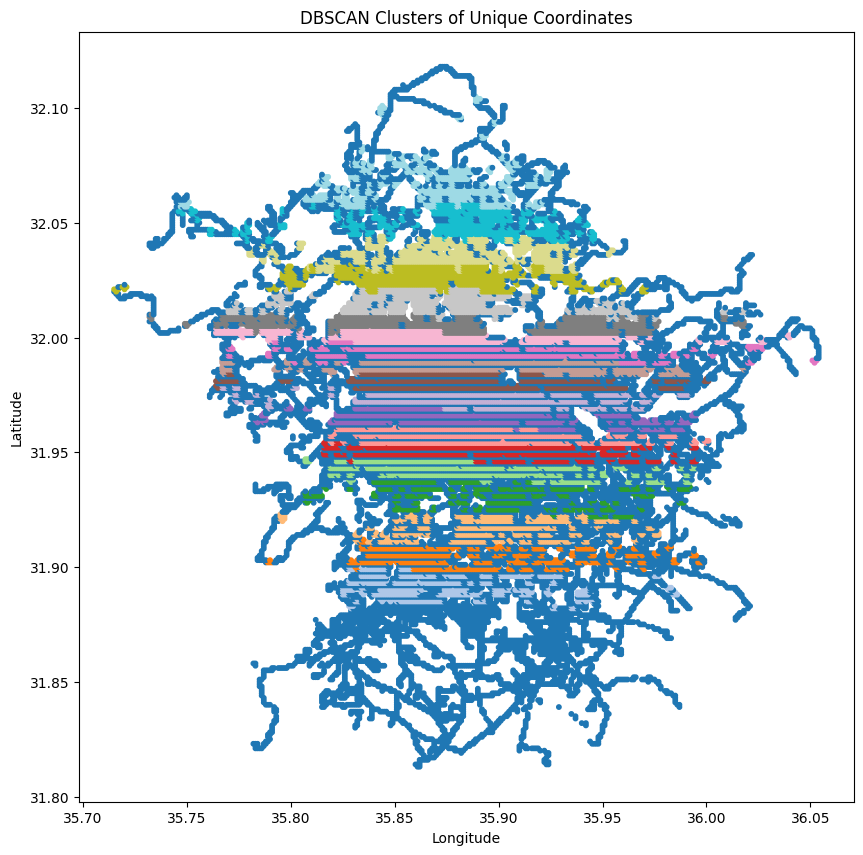

In [123]:
print(cluster_labels)
# Plot the clusters
plt.figure(figsize=(10, 10))
plt.scatter(unique_coords[:, 1], unique_coords[:, 0], c=cluster_labels, cmap='tab20', s=10)
plt.title('DBSCAN Clusters of Unique Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [124]:
import numpy as np
import collections

# Assuming `cluster_labels` contains the cluster assignment for each point
# Count the number of points in each cluster using collections.Counter
cluster_counts = collections.Counter(cluster_labels)

# Print the number of points per cluster
print(f"Number of points per cluster:")
for cluster_label, count in cluster_counts.items():
    if cluster_label == -1:
        print(f"Noise (-1): {count} points")
    else:
        print(f"Cluster {cluster_label}: {count} points")


Number of points per cluster:
Noise (-1): 13335 points
Cluster 0: 4 points
Cluster 1: 4 points
Cluster 2: 6 points
Cluster 3: 4 points
Cluster 5: 4 points
Cluster 4: 6 points
Cluster 7: 4 points
Cluster 6: 6 points
Cluster 8: 4 points
Cluster 10: 4 points
Cluster 11: 4 points
Cluster 12: 4 points
Cluster 13: 4 points
Cluster 9: 4 points
Cluster 14: 4 points
Cluster 15: 4 points
Cluster 16: 4 points
Cluster 17: 7 points
Cluster 18: 2 points
Cluster 19: 4 points
Cluster 21: 4 points
Cluster 20: 6 points
Cluster 22: 4 points
Cluster 23: 4 points
Cluster 24: 4 points
Cluster 25: 4 points
Cluster 26: 4 points
Cluster 31: 4 points
Cluster 32: 4 points
Cluster 27: 4 points
Cluster 33: 4 points
Cluster 28: 6 points
Cluster 29: 6 points
Cluster 30: 4 points
Cluster 34: 6 points
Cluster 35: 6 points
Cluster 38: 4 points
Cluster 36: 4 points
Cluster 37: 4 points
Cluster 39: 6 points
Cluster 40: 6 points
Cluster 43: 4 points
Cluster 41: 6 points
Cluster 42: 6 points
Cluster 44: 4 points
Cluster 45

In [125]:
labels = cluster_labels

### Evaluate the Clustering Performance

#### Silhouette Score

In [126]:
from sklearn.metrics import silhouette_score

# Filter out noise points (-1 labels) before calculating silhouette score
core_samples_mask = labels != -1

if len(set(labels[core_samples_mask])) > 1:  # Check if there are more than 1 cluster
    silhouette_avg = silhouette_score(unique_coords[core_samples_mask], labels[core_samples_mask])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Not enough clusters to calculate silhouette score")


Silhouette Score: 0.3796475764636876


#### Number of Clusters and Noise Points

In [127]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Subtract 1 if -1 (noise) is present
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 2470
Estimated number of noise points: 13335


#### Davies-Bouldin Index

In [128]:
from sklearn.metrics import davies_bouldin_score

# Exclude noise points
if len(set(labels[core_samples_mask])) > 1:
    dbi_score = davies_bouldin_score(unique_coords[core_samples_mask], labels[core_samples_mask])
    print(f'Davies-Bouldin Index: {dbi_score}')
else:
    print("Not enough clusters to calculate Davies-Bouldin Index")


Davies-Bouldin Index: 0.6743682741476693


#### Manual Inspection (Visual Evaluation)

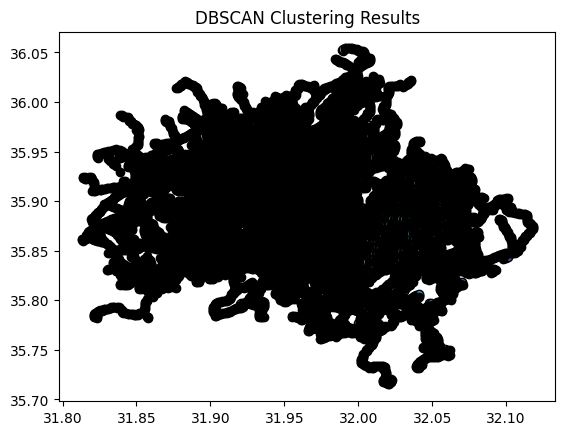

In [129]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = unique_coords[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering Results')
plt.show()


### Visualizing the clusters

In [130]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) excluding noise points (-1)
unique_labels = set(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))  # Generate colors for each cluster
for label, color in zip(unique_labels, colors):
    if label == -1:  # Skip noise points
        continue
    cluster_points = unique_coords[cluster_labels == label]
    
    # Check if cluster has more than 2 points for the convex hull
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        # Handle different geometry types (Polygon, LineString, or Point)
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            # Swap coordinates (lat, lon) -> (lon, lat) for folium
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            # Swap coordinates (lat, lon) -> (lon, lat) for folium
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
        
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)


# Save the map
m.save('DBSCAN/DBSCAN_clusters_map.html')
print("Map with cluster regions saved as 'DBSCAN_clusters_map.html'.")


Map with cluster regions saved as 'DBSCAN_clusters_map.html'.


In [131]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[cluster_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[cluster_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('DBSCAN/DBSCAN_clusters_map_with_noise.html')
print("Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.")


Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.


### Visualize the coords pre-clustering

In [132]:
import folium
import numpy as np

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Plot each point in unique_coords on the map
for coord in unique_coords:
    lat, lon = coord[0], coord[1]  # Swap lat/lon if necessary
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,  # Small radius for individual points
        color="blue",  # Blue color for unclustered points
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

# Save the map
m.save('Raw_Coordinates_Map.html')
print("Map with raw coordinates saved as 'Raw_Coordinates_Map.html'.")


Map with raw coordinates saved as 'Raw_Coordinates_Map.html'.


## OPTICS - failed always gives 1 cluster and the rest are noise


In [144]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Define a range of xi and min_cluster_size values to try
xi_values = np.linspace(0.05, 0.3, 6)  # Example range of xi values
min_cluster_sizes = np.linspace(0.05, 0.2, 4)  # Example range of min_cluster_size values

# Store results
best_xi = None
best_min_cluster_size = None
best_silhouette = -1  # Start with a low silhouette score for comparison
best_davies_bouldin = float('inf')

# Iterate over xi and min_cluster_size combinations
for xi in xi_values:
    for min_cluster_size in min_cluster_sizes:
        # Fit the OPTICS model
        optics_model = OPTICS(min_samples=10, xi=xi, min_cluster_size=min_cluster_size)
        optics_model.fit(unique_coords)
        
        # Get the cluster labels
        optics_labels = optics_model.labels_
        
        # Only evaluate clusters if more than one cluster is found
        n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
        if n_clusters > 1:
            # Calculate silhouette score (only works if there are multiple clusters)
            silhouette_avg = silhouette_score(unique_coords, optics_labels)
            
            # Calculate Davies-Bouldin score (lower is better)
            davies_bouldin_avg = davies_bouldin_score(unique_coords, optics_labels)
            
            # Update the best parameters based on the silhouette score or Davies-Bouldin
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_xi = xi
                best_min_cluster_size = min_cluster_size
            if davies_bouldin_avg < best_davies_bouldin:
                best_davies_bouldin = davies_bouldin_avg
                best_xi = xi
                best_min_cluster_size = min_cluster_size

print(f"Best xi: {best_xi}, Best min_cluster_size: {best_min_cluster_size}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Davies-Bouldin Score: {best_davies_bouldin}")


Best xi: None, Best min_cluster_size: None
Best Silhouette Score: -1
Best Davies-Bouldin Score: inf


In [143]:
from sklearn.cluster import OPTICS

# Assuming 'unique_coords' contains your dataset of coordinates (latitude and longitude)

# Step 1: Initialize the OPTICS model
optics_model = OPTICS(min_samples=9, xi=0.5, min_cluster_size=0.01, metric='manhattan')

# Step 2: Fit the model to the coordinates
optics_model.fit(unique_coords)

# Step 3: Get the cluster labels assigned by OPTICS
optics_labels = optics_model.labels_

# Step 4: Print the number of clusters (excluding noise points)
n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
print(f'Estimated number of clusters: {n_clusters_optics}')

# Print the number of points in each cluster
from collections import Counter
optics_counts = Counter(optics_labels)
print("Points per cluster:", optics_counts)


Estimated number of clusters: 1
Points per cluster: Counter({np.int64(0): 28468})


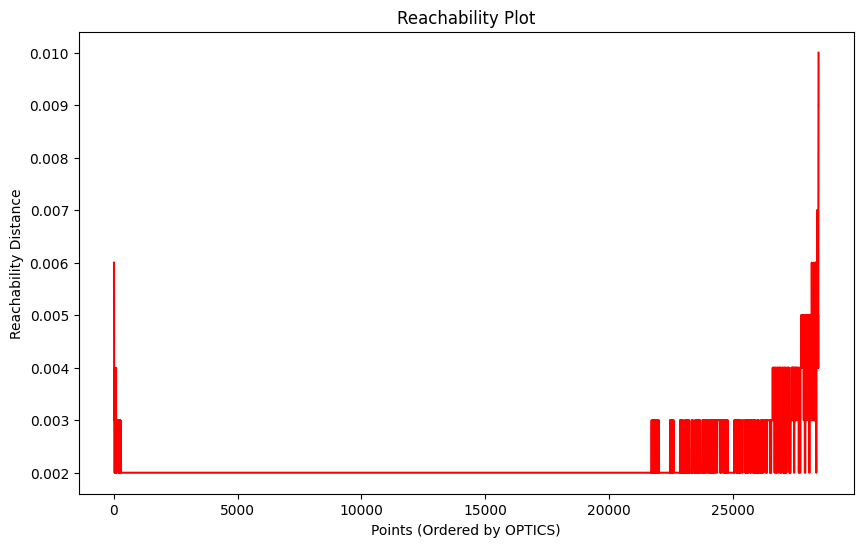

In [137]:
import matplotlib.pyplot as plt

# Reachability plot
space = np.arange(len(unique_coords))
reachability = optics_model.reachability_[optics_model.ordering_]

plt.figure(figsize=(10, 6))
plt.plot(space, reachability, 'r-', label='Reachability Distance')
plt.xlabel('Points (Ordered by OPTICS)')
plt.ylabel('Reachability Distance')
plt.title('Reachability Plot')
plt.show()


### Visualizing the Results

In [140]:
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Get unique labels (clusters including noise)
unique_labels_optics = set(optics_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels_optics) - 1))  # Exclude noise from color mapping

# Plot clusters
for label, color in zip([l for l in unique_labels_optics if l != -1], colors):
    cluster_points = unique_coords[optics_labels == label]
    
    if len(cluster_points) > 2:  # Convex hull calculation for clusters with more than 2 points
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords],
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)

# Plot noise points in gray
noise_points = unique_coords[optics_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('OPTICS/OPTICS_clusters_map_with_noise.html')
print("Map with clusters and noise saved as 'OPTICS_clusters_map_with_noise.html'.")


Map with clusters and noise saved as 'OPTICS_clusters_map_with_noise.html'.


# Grid Based Clustering

## STING

In [155]:
import numpy as np
import folium
from sklearn.cluster import KMeans

def sting_clustering(coords, grid_size=0.005):
    # Create grid cells by binning the lat/lng coordinates
    lat_bins = np.arange(min(coords[:, 0]), max(coords[:, 0]) + grid_size, grid_size)
    lon_bins = np.arange(min(coords[:, 1]), max(coords[:, 1]) + grid_size, grid_size)
    
    # Assign each point to a grid cell (using binning)
    lat_grid = np.digitize(coords[:, 0], lat_bins)
    lon_grid = np.digitize(coords[:, 1], lon_bins)
    
    # Combine lat_grid and lon_grid to create unique grid cell IDs
    grid_cells = np.vstack((lat_grid, lon_grid)).T
    unique_cells = np.unique(grid_cells, axis=0)
    
    # Cluster points within each cell using KMeans
    cluster_labels = np.zeros(len(coords)) - 1  # Initialize as noise (-1)
    cluster_id = 0
    
    for cell in unique_cells:
        cell_mask = (lat_grid == cell[0]) & (lon_grid == cell[1])
        cell_points = coords[cell_mask]
        
        if len(cell_points) > 5:  # Only cluster if there are enough points
            kmeans = KMeans(n_clusters=2)  # You can adjust the number of clusters per grid cell
            labels = kmeans.fit_predict(cell_points)
            cluster_labels[cell_mask] = labels + cluster_id
            cluster_id += 2  # Increment cluster ID
    
    return cluster_labels

# Apply STING clustering
sting_labels = sting_clustering(unique_coords, grid_size=0.005)

# Visualize STING clusters on a folium map
def visualize_clusters_on_map(coords, labels):
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    m = folium.Map(location=[np.mean(coords[:, 0]), np.mean(coords[:, 1])], zoom_start=12)
    
    for label, color in zip(unique_labels, colors):
        cluster_points = coords[labels == label]
        for coord in cluster_points:
            lat, lon = coord[0], coord[1]
            folium.CircleMarker(
                location=[lat, lon],
                radius=2,
                color=mcolors.rgb2hex(color),
                fill=True,
                fill_opacity=0.5
            ).add_to(m)
    
    # Save the map
    m.save('sting_clusters_map_005.html')
    print(f"STING Clustering: Map saved to 'sting_clusters_map.html'")
    return m

# Visualize STING results
m = visualize_clusters_on_map(unique_coords, sting_labels)

# Evaluate STING Clustering
print(f'Number of clusters: {len(set(sting_labels)) - (1 if -1 in sting_labels else 0)}')
print(f'Number of noise points: {np.sum(sting_labels == -1)}')


STING Clustering: Map saved to 'sting_clusters_map.html'
Number of clusters: 3266
Number of noise points: 1211


In [156]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(sting_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[sting_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[sting_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('STING_005_clusters_map_with_noise.html')
print("Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.")


Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.


## CLIQUE

In [167]:
import numpy as np
import folium
from sklearn.preprocessing import KBinsDiscretizer

def clique_clustering(coords, n_bins=70):
    # Discretize the latitude and longitude into n_bins
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    binned_coords = discretizer.fit_transform(coords)
    
    # Identify dense regions (bins with more than a threshold number of points)
    unique_bins, counts = np.unique(binned_coords, axis=0, return_counts=True)
    
    # Set a threshold for minimum points in a dense region
    threshold = 3
    dense_regions = unique_bins[counts > threshold]
    
    # Assign cluster labels based on bin membership
    cluster_labels = np.zeros(len(coords)) - 1  # Initialize as noise (-1)
    
    for i, coord in enumerate(binned_coords):
        for region in dense_regions:
            if np.array_equal(coord, region):
                cluster_labels[i] = np.where(np.all(dense_regions == region, axis=1))[0][0]
    
    return cluster_labels

# Apply CLIQUE clustering
clique_labels = clique_clustering(unique_coords, n_bins=70)

# Visualize CLIQUE clusters on a folium map
m = visualize_clusters_on_map(unique_coords, clique_labels)

# Evaluate CLIQUE Clustering
print(f'Number of clusters: {len(set(clique_labels)) - (1 if -1 in clique_labels else 0)}')
print(f'Number of noise points: {np.sum(clique_labels == -1)}')


STING Clustering: Map saved to 'sting_clusters_map.html'
Number of clusters: 2038
Number of noise points: 567


threshold = 5 an n bins = 70

In [165]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(clique_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[clique_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[clique_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('CLIQUE_70_3_clusters_map_with_noise.html')
print("Map with clusters and noise saved.")


Map with clusters and noise saved.


# Heirarchical Clustering - Agglomerative

In [168]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical (Agglomerative) Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.005)  # Adjust distance_threshold
hierarchical_labels = hierarchical_model.fit_predict(unique_coords)

# Visualize Hierarchical Clusters on a folium map
m = visualize_clusters_on_map(unique_coords, hierarchical_labels)

# Evaluate Hierarchical Clustering
print(f'Number of clusters: {len(set(hierarchical_labels))}')
print(f'Number of noise points: {np.sum(hierarchical_labels == -1)}')  # Agglomerative doesn't usually label noise


STING Clustering: Map saved to 'sting_clusters_map.html'
Number of clusters: 3940
Number of noise points: 0


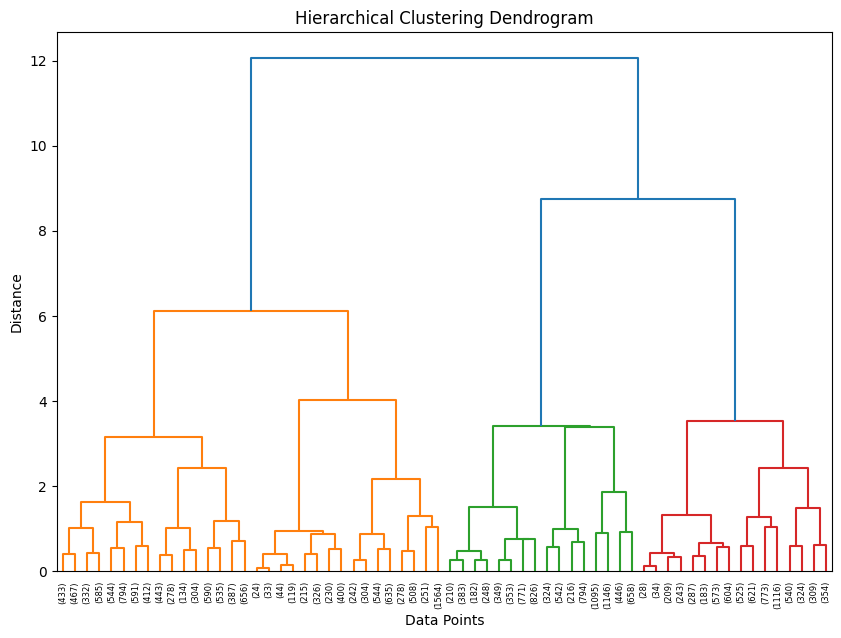

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming `unique_coords` contains the coordinates (latitude, longitude)
# Step 1: Perform hierarchical clustering using `linkage` method
Z = linkage(unique_coords, method='ward')  # 'ward' minimizes the variance within clusters

# Step 2: Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='level', p=5)  # Truncate to show the top p levels of the hierarchy
plt.show()


In [ ]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(clique_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[clique_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[clique_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('hierarchical_clusters_map_with_noise.html')
print("Map with clusters and noise saved.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Step 1: Perform Agglomerative Clustering and Fit the Model
# Here, unique_coords is the array with your latitude and longitude coordinates
# Adjust the distance threshold to control cluster granularity

distance_threshold = 0.005  # Adjust based on your data (in degrees)
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold)
hierarchical_labels = agg_clustering.fit_predict(unique_coords)

# Step 2: Visualize the Dendrogram using Scipy's `linkage` function
# The linkage method requires pairwise distances, so we'll compute them

# Compute linkage matrix based on pairwise distances
Z = linkage(unique_coords, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Agglomerative Clustering)')
plt.xlabel('Data Points (or Clusters)')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='level', p=5)  # Show the top 5 levels of hierarchy
plt.show()

# Step 3: Print Results
n_clusters = len(set(hierarchical_labels))
print(f'Number of clusters: {n_clusters}')
